In [1]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/param_files/')
from model_files.nerm_pvals import model 
import pandas as pd
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
from scipy.optimize import curve_fit

In [3]:
c0 = np.load('../NecroptosisSens/cluster0/necro_pars10k_cluster0_5720_mod.npy')
c1 = np.load('../NecroptosisSens/cluster1/necro_pars10k_cluster1_5720_mod.npy')
c2 = np.load('../NecroptosisSens/cluster2/necro_pars10k_cluster2_5720_mod.npy')
c3 = np.load('../NecroptosisSens/cluster3/necro_pars10k_cluster3_5720_mod.npy')

In [4]:
print(c2[0])

[2.32600000e+03 4.80000000e+03 4.69600000e+03 4.00000000e+04
 1.17760000e+04 9.00000000e+03 9.00000000e+03 9.00000000e+03
 3.10900000e+03 3.90000000e+03 7.22600000e+03 3.79900000e+03
 1.06540000e+04 5.54400000e+03 1.98794695e-07 5.49030660e-05
 2.79985027e-04 6.93725898e-02 4.02442372e+00 3.34497415e+02
 1.16178260e-03 1.37493377e-02 1.83963104e-07 1.09571830e-01
 2.06022182e-03 7.27252952e-03 1.56339761e-02 1.22496256e-04
 2.40319546e-01 1.98512681e-03 1.75780767e-01 2.40319546e-01
 6.43362879e-07 1.75780767e-01 2.00635884e+03 6.62228312e-04
 1.07201489e-04 6.72046457e-04 7.87039186e-03 1.30055693e+00
 6.08007774e-02 3.81244753e+01 5.45753992e-03 1.65739974e+00
 1.19342779e-03 3.03563288e-04 1.33209971e+01 1.88650892e+00
 1.55022611e-04 2.36576569e-03 5.26505520e-06 2.41568281e+00
 9.17830983e-01 4.92855732e+03]


In [2]:
print(model.observables)

ComponentSet([
 Observable('MLKLa_obs', MLKL(bRHIM=None, state='active')),
 Observable('CII_C8a_obs', TRADD(brec=None, brip=3, bDD1=None, bDD2=None) % RIP1(bscf=3, bub1=None, bub2=None, bub3=None, bDD=1, btraf=None, bRHIM=None, bMLKL=None, state='deub') % FADD(bDD=1, bDED1=2, bDED2=None) % C8(bf=2, flip=4, state='A') % FLIP(bDED=4, state='A')),
 Observable('CII_RIP3_obs', TRADD(brec=None, brip=3, bDD1=None, bDD2=None) % RIP1(bscf=3, bub1=None, bub2=None, bub3=None, bDD=1, btraf=None, bRHIM=5, bMLKL=None, state='deub') % FADD(bDD=1, bDED1=None, bDED2=None) % RIP3(bRHIM=5, bDD=None, state='unmod')),
 Observable('RIP1RIP3unmod_obs', RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=5, bMLKL=None, state='po4') % RIP3(bRHIM=5, bDD=1, state='po4') % MLKL(bRHIM=1, state='unmod')),
 Observable('CI_k63_obs', TNF(brec=1) % TNFR(blig=1, brip=2) % TRADD(brec=2, brip=3, bDD1=None, bDD2=None) % RIP1(bscf=3, bub1=None, bub2=None, bub3=None, bDD=None, btraf=4, bRHIM=None, bM

In [5]:
tspan2 = np.linspace(0,1800,500)
m = model.components
solverwtm1 = ScipyOdeSimulator(model, tspan=tspan2, verbose = True)
mode1wtm1  = solverwtm1.run(param_values=c2, num_processors = 20)
mode1df_wtm1 = mode1wtm1.dataframe

2022-01-07 21:36:34.625 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-07 21:36:35.399 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-07 21:36:35.519 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-07 21:36:35.668 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-07 21:38:10.560 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-07 21:38:10.561 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-07 21:38:12.085 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


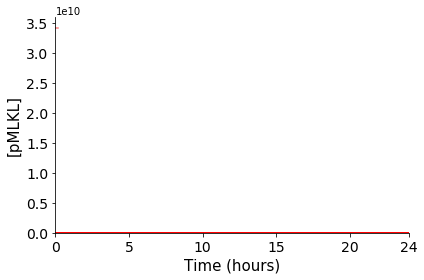

In [7]:
fig, ax = plt.subplots()
for n in range(len(c2)):
    plt.plot(tspan2/60, mode1df_wtm1.loc[n]['MLKLtot_obs'].iloc[:]/mode1df_wtm1.loc[n]['MLKLa_obs'].iloc[:].max(), lw=1.5, 
             zorder = 1, color = 'red', alpha = 0.5) 
#     plt.plot(tspan2/60, mode1df_wtm1kd.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, 
#              zorder = 1, color =  'blue', alpha = 0.3)
#     plt.plot(tspan2/60, mode1df_wtm1oe.loc[n]['MLKLa_obs'], lw=1.5, 
#              zorder = 1, color = 'green', alpha = 0.5) 
plt.xlabel("Time (hours)", fontsize=15)
plt.ylabel('[pMLKL]', fontsize=15)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.grid(False)
plt.tight_layout()
# plt.savefig('pmlkl_allpars_clus0_tnf100_noframe.pdf')
plt.show() 